In [40]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import requests

def get_location_name(latitude, longitude):
    """
    Use Nominatim Reverse Geocoding to get a human-readable address from latitude and longitude.
    """
    try:
        url = f"https://nominatim.openstreetmap.org/reverse"
        params = {
            "lat": latitude,
            "lon": longitude,
            "format": "json",
            "addressdetails": 1
        }
        headers = {
            "User-Agent": "YourAppName/1.0 (your_email@example.com)"  # Replace with your app name and contact info
        }
        response = requests.get(url, params=params, headers=headers)
        if response.status_code == 200:
            data = response.json()
            # Extract the location name from the response
            return data.get("display_name", "Unknown Location")
        else:
            return "Unknown Location"
    except Exception as e:
        print(f"Error in reverse geocoding: {e}")
        return "Unknown Location"

def get_point(lat, lon):
    return Point(lon, lat)

def get_city_rating(lat, lon, indian_cities):
    point = get_point(lat, lon)
    for _, city in indian_cities.iterrows():
        if city['geometry'].contains(point):
            return city['Rating']
    return 0

def get_country_rating(lat, lon, asia_countries):
    point = get_point(lat, lon)
    for _, country in asia_countries.iterrows():
        if country['geometry'].contains(point):
            return country['Rating']
    return 0

def get_continent_rating(lat, lon, continents):
    point = get_point(lat, lon)
    for _, continent in continents.iterrows():
        if continent['geometry'].contains(point):
            return continent['Rating']
    return 0

def get_combined_rating(lat, lon, indian_cities, asia_countries, continents):
    # Check city rating
    city_rating = get_city_rating(lat, lon, indian_cities)
    if city_rating:
        return city_rating
    
    # Check country rating
    country_rating = get_country_rating(lat, lon, asia_countries)
    if country_rating:
        return country_rating
    
    # Check continent rating
    return get_continent_rating(lat, lon, continents)

# Load GeoJSON or shapefiles
# indian_cities = gpd.read_file('path_to_indian_cities.geojson')
# indian_cities['Rating'] = [100, 90, 80, 70, 60]  # Example ratings

# countries = ['Slovakia', 'N. Cyprus', 'Suriname', 'Mongolia', 'New Zealand', 'Antarctica', 'Spain', 
#              'Djibouti', 'Trinidad and Tobago', 'Nigeria', 'Belize', 'Guinea-Bissau', 'Somaliland', 
#              'Somalia', 'Burundi', 'Pakistan', 'Moldova', 'Denmark', 'Falkland Is.', 'Latvia', 
#              'Russia', 'China', 'Tajikistan', 'Switzerland', 'Kazakhstan', 'Paraguay', 'Bulgaria', 
#              'Croatia', 'South Korea', 'Bhutan', 'United States of America', 'Egypt', 'North Macedonia', 
#              'Sudan', 'Puerto Rico', 'Vanuatu', 'Zimbabwe', 'Yemen', 'Jordan', 'Honduras', 'Guyana', 
#              'Iraq', 'Rwanda', 'Namibia', 'Benin', 'Brazil', 'Ghana', 'Netherlands', 'Nicaragua', 'Uzbekistan', 
#              'Kenya', 'Norway', 'Laos', 'Timor-Leste', 'Germany', 'South Africa', 'Angola', 'Oman', 'Nepal', 
#              'Colombia', 'Libya', 'Bosnia and Herz.', 'Madagascar', 'Guinea', 'Fiji', 'Romania', 'Japan', 
#              'Mauritania', 'Austria', 'Sri Lanka', 'Lesotho', 'eSwatini', 'Chad', 'Venezuela', 'Niger', 'Iran', 
#              'Senegal', 'Australia', 'Italy', 'Ireland', 'Turkey', 'Gambia', 'Kuwait', 'Congo', 'United Arab Emirates', 
#              'Syria', 'Palestine', 'Finland', 'Azerbaijan', 'Greece', 'Kosovo', 'Taiwan', 'W. Sahara', 'India', 
#              'Luxembourg', 'Bahamas', 'Sierra Leone', 'Eritrea', 'Ukraine', 'El Salvador', 'Morocco', 'Armenia', 
#              'Cambodia', 'Guatemala', 'Brunei', 'Indonesia', 'Peru', 'Liberia', 'Panama', 'Burkina Faso', 'Greenland', 
#              'Dominican Rep.', 'Bolivia', 'Gabon', 'Malawi', 'Dem. Rep. Congo', 'Uganda', 'Lithuania', 'Turkmenistan', 
#              'Tanzania', "Côte d'Ivoire", 'Solomon Is.', 'Georgia', 'Canada', 'Papua New Guinea', 'Sweden', 'Estonia', 
#              'Belarus', 'Philippines', 'Uruguay', 'Poland', 'Jamaica', 'Costa Rica', 'Argentina', 'Bangladesh', 'Serbia', 
#              'Kyrgyzstan', 'France', 'Slovenia', 'Ethiopia', 'S. Sudan', 'New Caledonia', 'United Kingdom', 'Iceland', 'Mali', 
#              'Fr. S. Antarctic Lands', 'Qatar', 'Saudi Arabia', 'Togo', 'Central African Rep.', 'Myanmar', 'Chile', 
#              'North Korea', 'Belgium', 'Zambia', 'Cameroon', 'Algeria', 'Czechia', 'Botswana', 'Cyprus', 'Thailand', 
#              'Portugal', 'Eq. Guinea', 'Israel', 'Mozambique', 'Cuba', 'Montenegro', 'Ecuador', 'Haiti', 'Malaysia', 
#              'Lebanon', 'Vietnam', 'Mexico', 'Hungary', 'Tunisia', 'Albania', 'Afghanistan']

Tier1_Countries = ['India']
Tier2_Countries = ['United Kingdom', 'South Africa', 'Kenya', 'Canada']
Tier3_Countries = ['United Arab Emirates', 'United States of America']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['Rating'] = [10]*len(world)
for i in range(len(world)):
    if world['name'][i] in Tier1_Countries:
        world['Rating'][i] = 100
    elif world['name'][i] in Tier2_Countries:
        world['Rating'][i] = 60
    elif world['name'][i] in Tier3_Countries:
        world['Rating'][i] = 40

# asia_countries = world[world['continent'] == 'Asia']

# print(world[['continent','name','Rating']])

# print(asia_countries[['continent','name','Rating']])
# continents = gpd.read_file('path_to_continent_geojson.geojson')
# continents['Rating'] = [50, 40, 60, 70, 80]  # Example ratings

# Test with input latitude and longitude
lat, lon = 1.446301, 104.345450  # Coordinates for Ahmedabad
# rating = get_combined_rating(lat, lon, indian_cities, asia_countries, continents)
rating = get_country_rating(lat,lon, world)
location = get_location_name(lat,lon)

print(f"Rating for {location} ({lat}, {lon}): {rating}")


/var/folders/w5/pn9_tz8x2s540x1xs34bb50c0000gn/T/ipykernel_20940/1598008100.py:101: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/w5/pn9_tz8x2s540x1xs34bb50c0000gn/T/ipykernel_20940/1598008100.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world['Rating'][i] = 60
/var/folders/w5/pn9_tz8x2s540x1xs34bb50c0000gn/T/ipykernel_20940/1598008100.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Rating for Johor, Malaysia (1.446301, 104.34545): 0


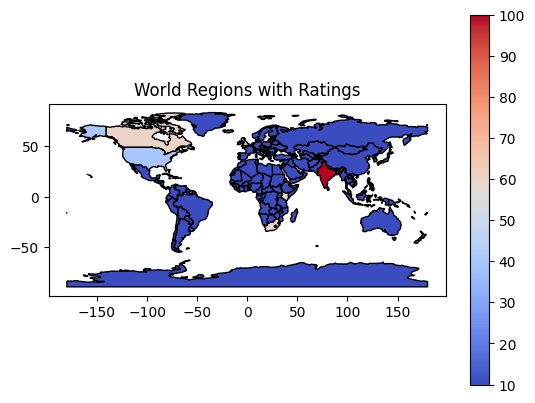

In [27]:
# Plot the regions with ratings
world.plot(column='Rating', legend=True, cmap='coolwarm', edgecolor='black')
plt.title('World Regions with Ratings')
plt.show()